In [2]:
import quantstats as qs
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.colors import LinearSegmentedColormap
from quantstats.stats import *
from quantstats._plotting.wrappers import distribution
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import df2img
from datetime import date

# my imports
import sys
sys.path.insert(1, '../scripts')
import utils as utl
import html_evaluation_portfolio as hep
import volatility_estimator as ve

In [24]:
list_securities = ['SSO', 'UBT', 'UGL'] #, 'TYD'] #['SSO', 'UBT', 'UGL', 'DIG', 'UST'] #['SPY', 'TLT', 'GLD']
title = ' std dev estimator'
estimator = 'stdv'
#start_date = pd.to_datetime('2007-01-03') 
#end_date = pd.to_datetime(start_date) + pd.DateOffset(days=1814) 
end_date = date.today()
start_date = pd.to_datetime(end_date) - pd.DateOffset(days=1834) 

if estimator not in ['stdv', 'parkinson', 'satchell']:
    raise ValueError('estimator has to be one of : stdv, parkison, satchell')

In [25]:
data = hep.create_dataframe(list_securities) #I can import this dataframe but it is preatty fast.

if estimator == 'stdv':
    unique_name = 'stdv'
    for i in list_securities:
        unique_name += '_' + i
        
    df_strd_dev = ve.dataframe_strd_dev(data, window)
    df_strd_dev = ve.index_df(df_strd_dev, data, window)
    data_perc = hep.perc_df(data)
    inv_volat_data = hep.df_inverse_volatility(data_perc, window)
    df_weighted = hep.df_wheighted(inv_volat_data)
    
if estimator == 'parkinson':
    unique_name = 'parkinson'
    for i in list_securities:
        unique_name += '_' + i

    data_h_l = ve.create_dataframe_high_low(list_securities)   
    #data_h_l = data_h_l[1135: 1135 + 1834]
    data_h_l = data_h_l.loc[start_date: end_date]
    df_volat = ve.compute_park_volatility(data_h_l, list_securities, window)
    data.dropna(inplace = True)
    #data = data[1135: 1135 + 1834]
    data = data[start_date: end_date]
    df_volat = ve.index_df(df_volat, data, window)
    df_weighted = hep.df_wheighted(df_volat)

if estimator == 'satchell':
    unique_name = 'satchell'
    for i in list_securities:
        unique_name += '_' + i
        
    data_ohlc = ve.create_dataframe_ohlc(list_securities)
    #data_holc = data_holc[1135: 1135 + 1834]
    data_ohlc = data_ohlc[start_date: end_date]
    df_satchell_volat = ve.compute_satchell_volatility(data_ohlc, list_securities, window)
    data.dropna(inplace = True)
    #data = data[1135: 1135 + 1834]
    data = data[start_date: end_date]
    df_satchell_volat = ve.index_df(df_satchell_volat, data, window)
    df_weighted = hep.df_wheighted(df_satchell_volat)
    
data_r = data.div(data.shift(1))-1
data_earnings = hep.df_earnings(df_weighted, data_r)
data_earnings.dropna(inplace = True)
    
data_earnings = data_earnings[start_date: end_date]

In [11]:
df_weight_x1_lev = df_weighted[start_date: end_date] 

In [26]:
df_weight_x2_lev = df_weighted[start_date: end_date] 

In [27]:
pd.merge(df_weight_x1_lev, df_weight_x2_lev, left_index=True, right_index=True)

,VTI,VGLT,IAU,SSO,UBT,UGL
2017-04-17,0.390493,0.318649,0.290857,0.410214,0.310350,0.279436
2017-04-18,0.396845,0.301801,0.301355,0.411083,0.298555,0.290362
2017-04-19,0.401971,0.296069,0.301960,0.416112,0.293819,0.290069
2017-04-20,0.383048,0.302318,0.314634,0.396801,0.302058,0.301141
2017-04-21,0.373190,0.309102,0.317708,0.386195,0.308297,0.305508
...,...,...,...,...,...,...
2022-04-18,0.280385,0.371880,0.347735,0.301915,0.354252,0.343833
2022-04-19,0.295837,0.363840,0.340323,0.318806,0.346069,0.335126
2022-04-20,0.292851,0.330727,0.376422,0.314066,0.314449,0.371485
2022-04-21,0.282751,0.307421,0.409828,0.303799,0.292220,0.403981


           VTI      VGLT       IAU       SSO       UBT       UGL
VTI   1.000000 -0.470914 -0.678091  0.973595 -0.678399 -0.732247
VGLT -0.470914  1.000000 -0.329060 -0.589654  0.895615 -0.037479
IAU  -0.678091 -0.329060  1.000000 -0.550898 -0.019996  0.815042
SSO   0.973595 -0.589654 -0.550898  1.000000 -0.721982 -0.727119
UBT  -0.678399  0.895615 -0.019996 -0.721982  1.000000  0.049961
UGL  -0.732247 -0.037479  0.815042 -0.727119  0.049961  1.000000


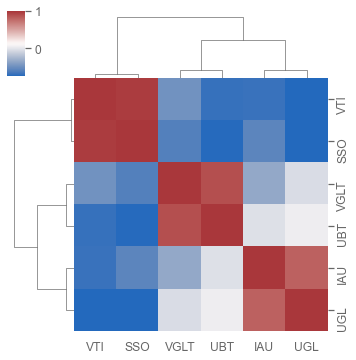

In [28]:
corr = df_weight_x1_lev.join(df_weight_x2_lev).corr()
print(corr)
sns.clustermap(corr, figsize=(5,5), cmap='vlag')